In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings

dataset link from kaggle : https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction

In [77]:
#reading the dataset of csv file 
data = pd.read_csv("Medicalpremium.csv")
data

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,23.73,0,0.0,0,25000
1,60,1,0,0,0,180,73,NaN,0,0.0,0,29000
2,36,1,1,0,0,158,59,NaN,0,0.0,1,23000
3,52,1,1,0,1,183,93,27.77,0,0.0,2,28000
4,38,0,0,0,1,166,88,31.93,0,0.0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,23.46,0,0.0,0,15000
982,64,1,1,0,0,153,70,29.90,0,0.0,3,28000
983,56,0,1,0,0,155,71,29.55,0,0.0,1,29000
984,47,1,1,0,0,158,73,29.24,1,NaN,1,39000


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   BMI                      844 non-null    float64
 8   KnownAllergies           986 non-null    int64  
 9   HistoryOfCancerInFamily  939 non-null    float64
 10  NumberOfMajorSurgeries   986 non-null    int64  
 11  PremiumPrice             986 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 92.6 KB


In [79]:
data.isna().sum()

Age                          0
Diabetes                     0
BloodPressureProblems        0
AnyTransplants               0
AnyChronicDiseases           0
Height                       0
Weight                       0
BMI                        142
KnownAllergies               0
HistoryOfCancerInFamily     47
NumberOfMajorSurgeries       0
PremiumPrice                 0
dtype: int64

In [80]:
#filling the missing values in the dataset by simple imputer using strategy most frequent
imputer1 = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
data[['HistoryOfCancerInFamily']] = imputer1.fit_transform(data[['HistoryOfCancerInFamily']])

##filling the missing values in the dataset by knn imputer of neighbors 3
imputer = KNNImputer(n_neighbors=3)
data[['BMI']] = imputer.fit_transform(data[['BMI']])

In [81]:
data.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
BMI                        0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [82]:
df = data

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      986 non-null    int64  
 1   Diabetes                 986 non-null    int64  
 2   BloodPressureProblems    986 non-null    int64  
 3   AnyTransplants           986 non-null    int64  
 4   AnyChronicDiseases       986 non-null    int64  
 5   Height                   986 non-null    int64  
 6   Weight                   986 non-null    int64  
 7   BMI                      986 non-null    float64
 8   KnownAllergies           986 non-null    int64  
 9   HistoryOfCancerInFamily  986 non-null    float64
 10  NumberOfMajorSurgeries   986 non-null    int64  
 11  PremiumPrice             986 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 92.6 KB


In [84]:

X = df.drop("PremiumPrice",axis=1)
y = df["PremiumPrice"]
X.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries
0,45,0,0,0,0,155,57,23.730000,0,0.0,0
1,60,1,0,0,0,180,73,27.452986,0,0.0,0
2,36,1,1,0,0,158,59,27.452986,0,0.0,1
3,52,1,1,0,1,183,93,27.770000,0,0.0,2
4,38,0,0,0,1,166,88,31.930000,0,0.0,1


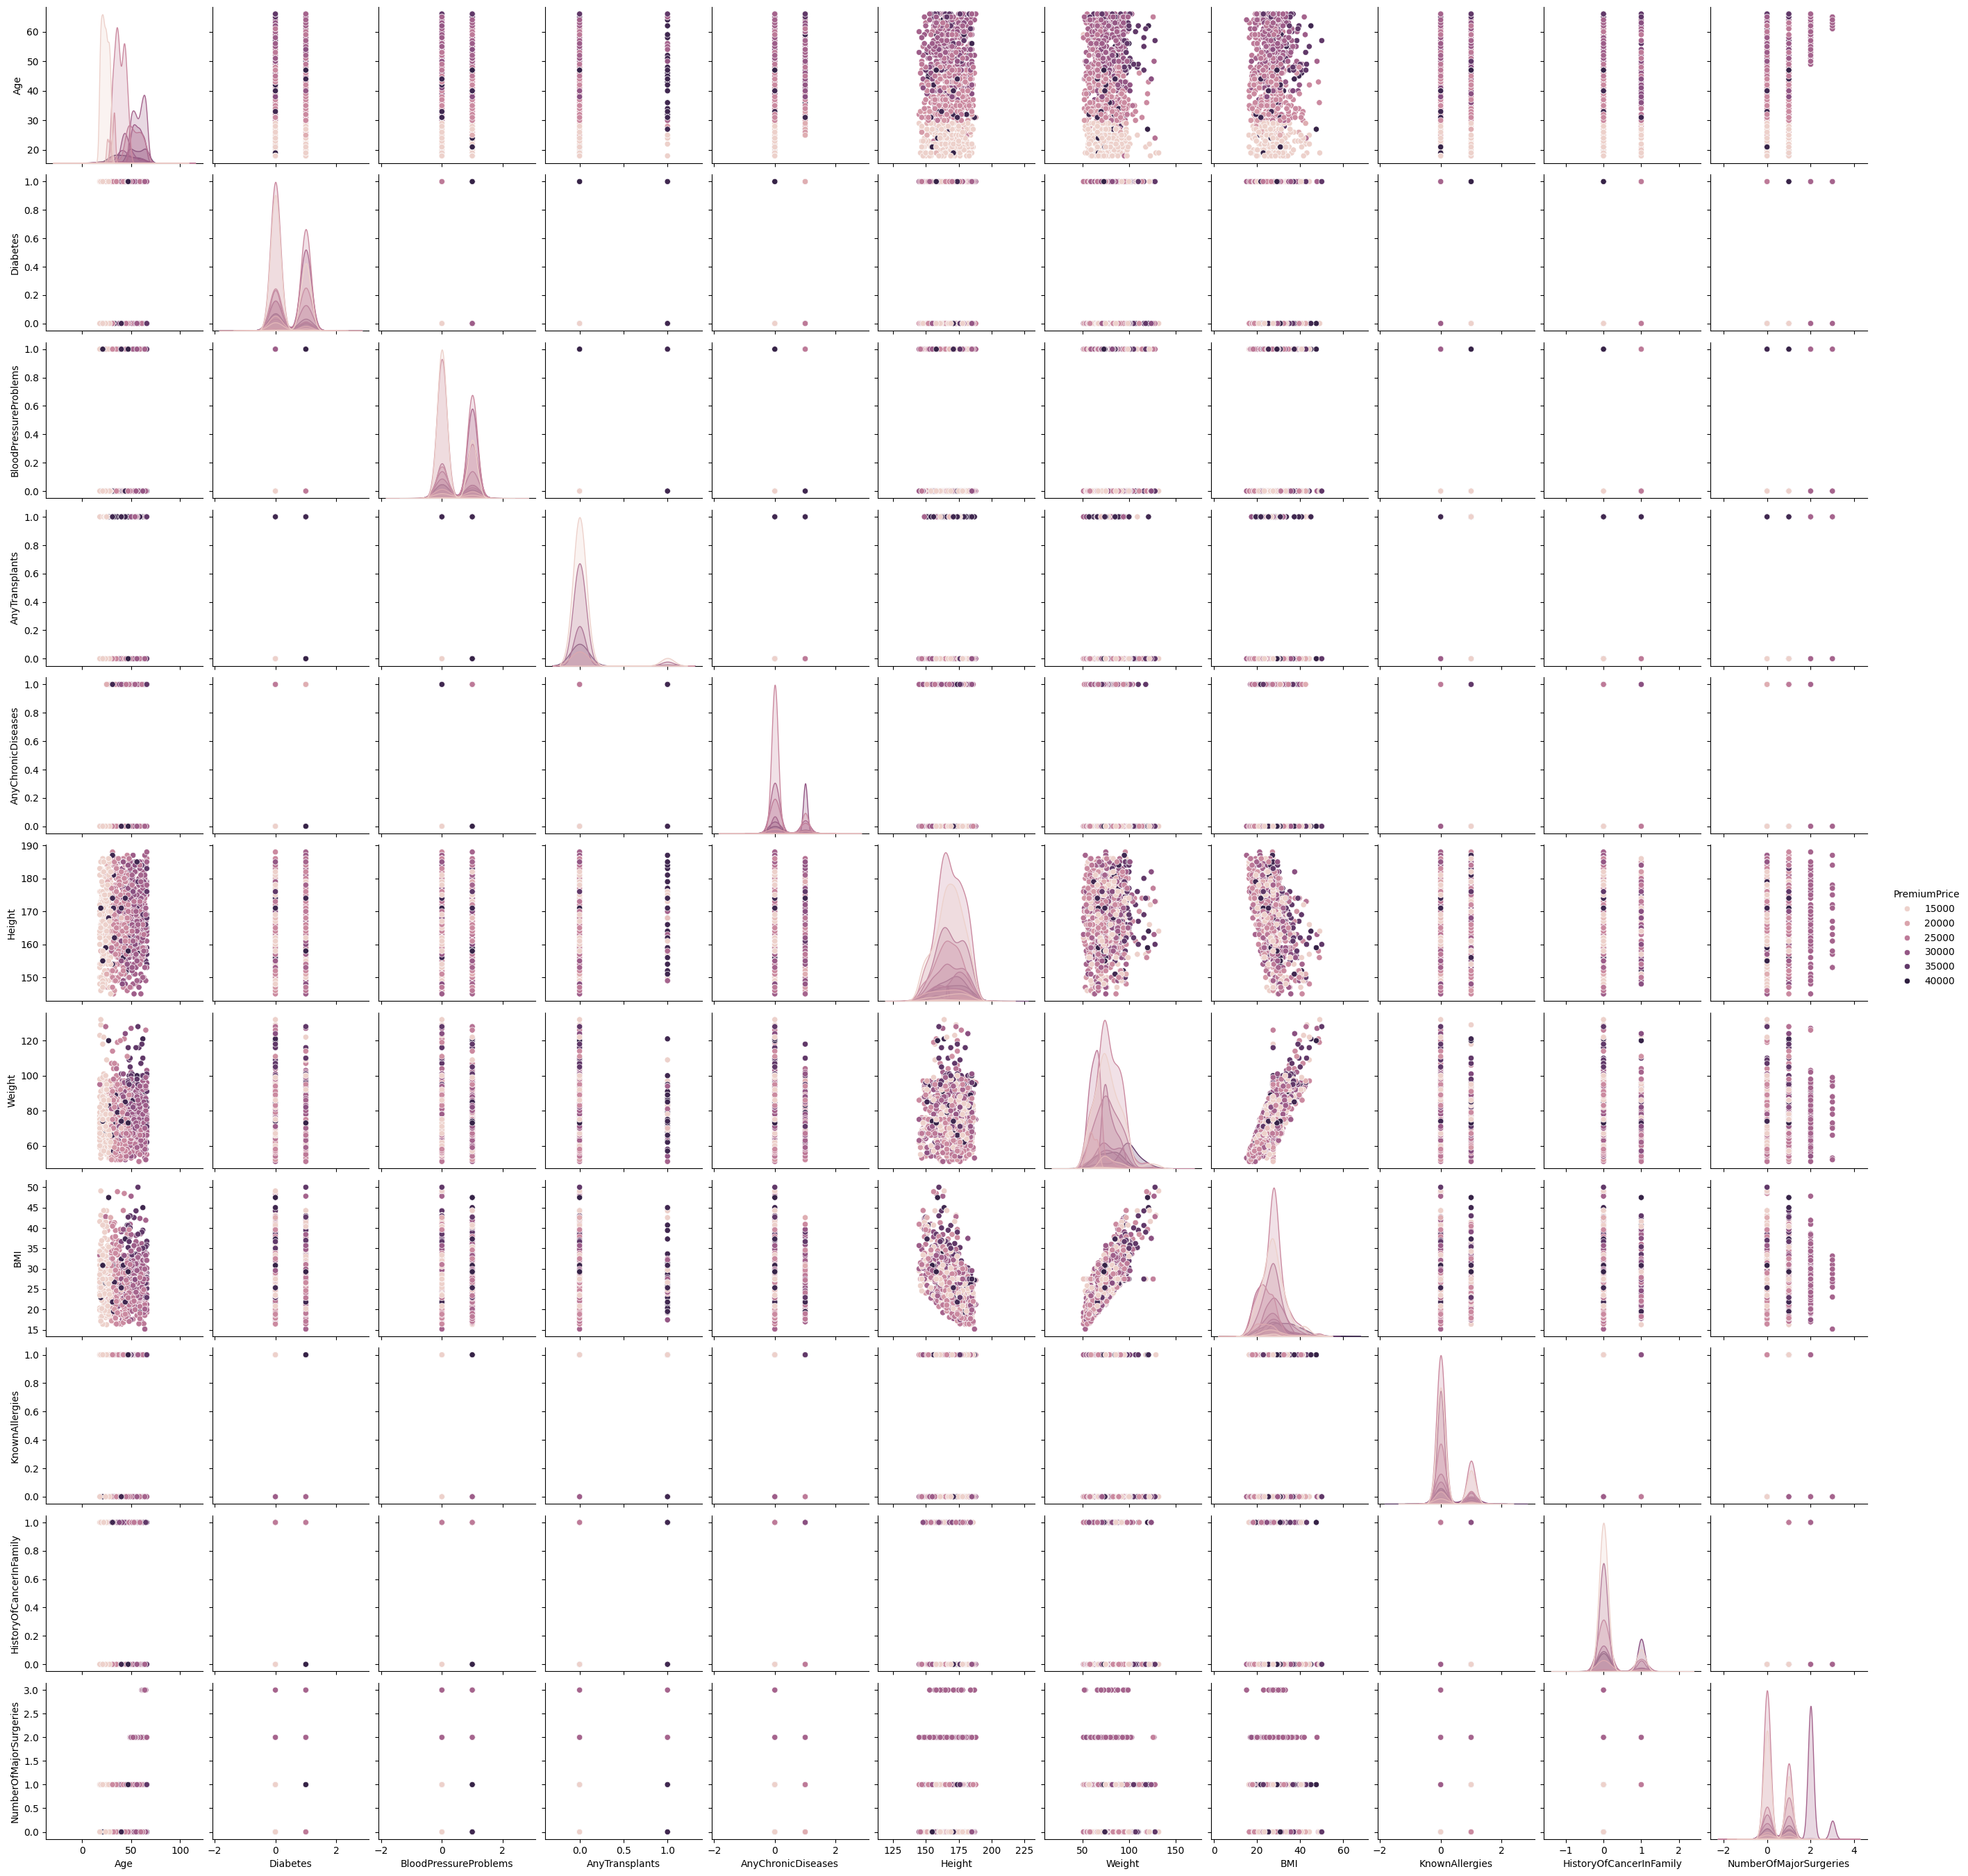

In [85]:
sns.pairplot(df[['Age',	'Diabetes',	'BloodPressureProblems',	'AnyTransplants',	'AnyChronicDiseases',	'Height',	'Weight',   'BMI',	'KnownAllergies',	'HistoryOfCancerInFamily',	'NumberOfMajorSurgeries',	'PremiumPrice'] ], hue='PremiumPrice')
plt.show()

In [86]:
df.corr()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,BMI,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
Age,1.000000,0.210908,0.244888,-0.008549,0.051072,0.039879,-0.018590,-0.033426,-0.024416,-0.022638,0.429181,0.697540
Diabetes,0.210908,1.000000,0.127727,-0.036652,-0.089428,-0.003783,-0.024563,-0.021181,-0.080102,-0.054487,0.122722,0.076209
BloodPressureProblems,0.244888,0.127727,1.000000,-0.024538,0.045424,-0.037926,-0.061016,-0.039299,-0.011550,0.051379,0.251568,0.167097
AnyTransplants,-0.008549,-0.036652,-0.024538,1.000000,0.035285,-0.031543,0.002087,0.033169,0.001876,-0.018080,-0.004154,0.289056
AnyChronicDiseases,0.051072,-0.089428,0.045424,0.035285,1.000000,0.047419,-0.033318,-0.052190,-0.027418,0.004970,0.014835,0.208610
Height,0.039879,-0.003783,-0.037926,-0.031543,0.047419,1.000000,0.066946,-0.485059,-0.010200,0.008003,0.037289,0.026910
Weight,-0.018590,-0.024563,-0.061016,0.002087,-0.033318,0.066946,1.000000,0.769280,0.037492,0.001701,-0.006108,0.141507
BMI,-0.033426,-0.021181,-0.039299,0.033169,-0.052190,-0.485059,0.769280,1.000000,0.042280,0.005097,-0.020196,0.109006
KnownAllergies,-0.024416,-0.080102,-0.011550,0.001876,-0.027418,-0.010200,0.037492,0.042280,1.000000,0.106203,0.103923,0.012103
HistoryOfCancerInFamily,-0.022638,-0.054487,0.051379,-0.018080,0.004970,0.008003,0.001701,0.005097,0.106203,1.000000,0.210848,0.082567


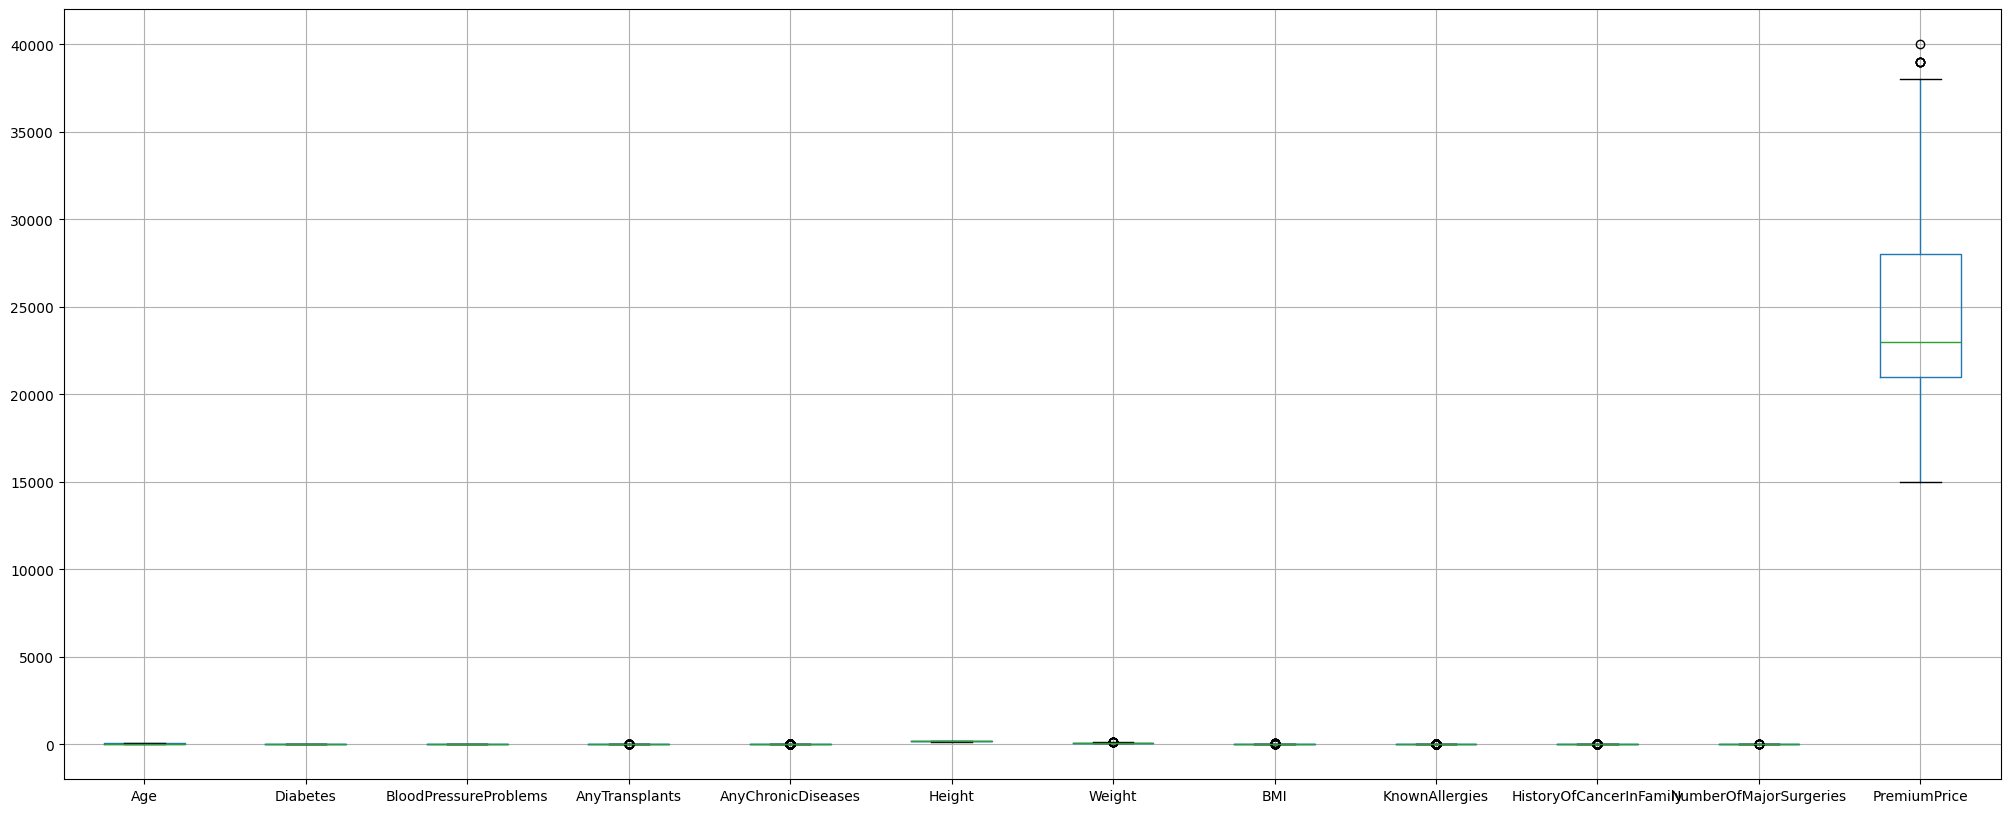

In [87]:
plt.figure(figsize=(25,10))
df.boxplot()
plt.show()

In [89]:
df['PremiumPrice'] = np.log(df['PremiumPrice'])
df['BMI'] = np.log(df['BMI'])

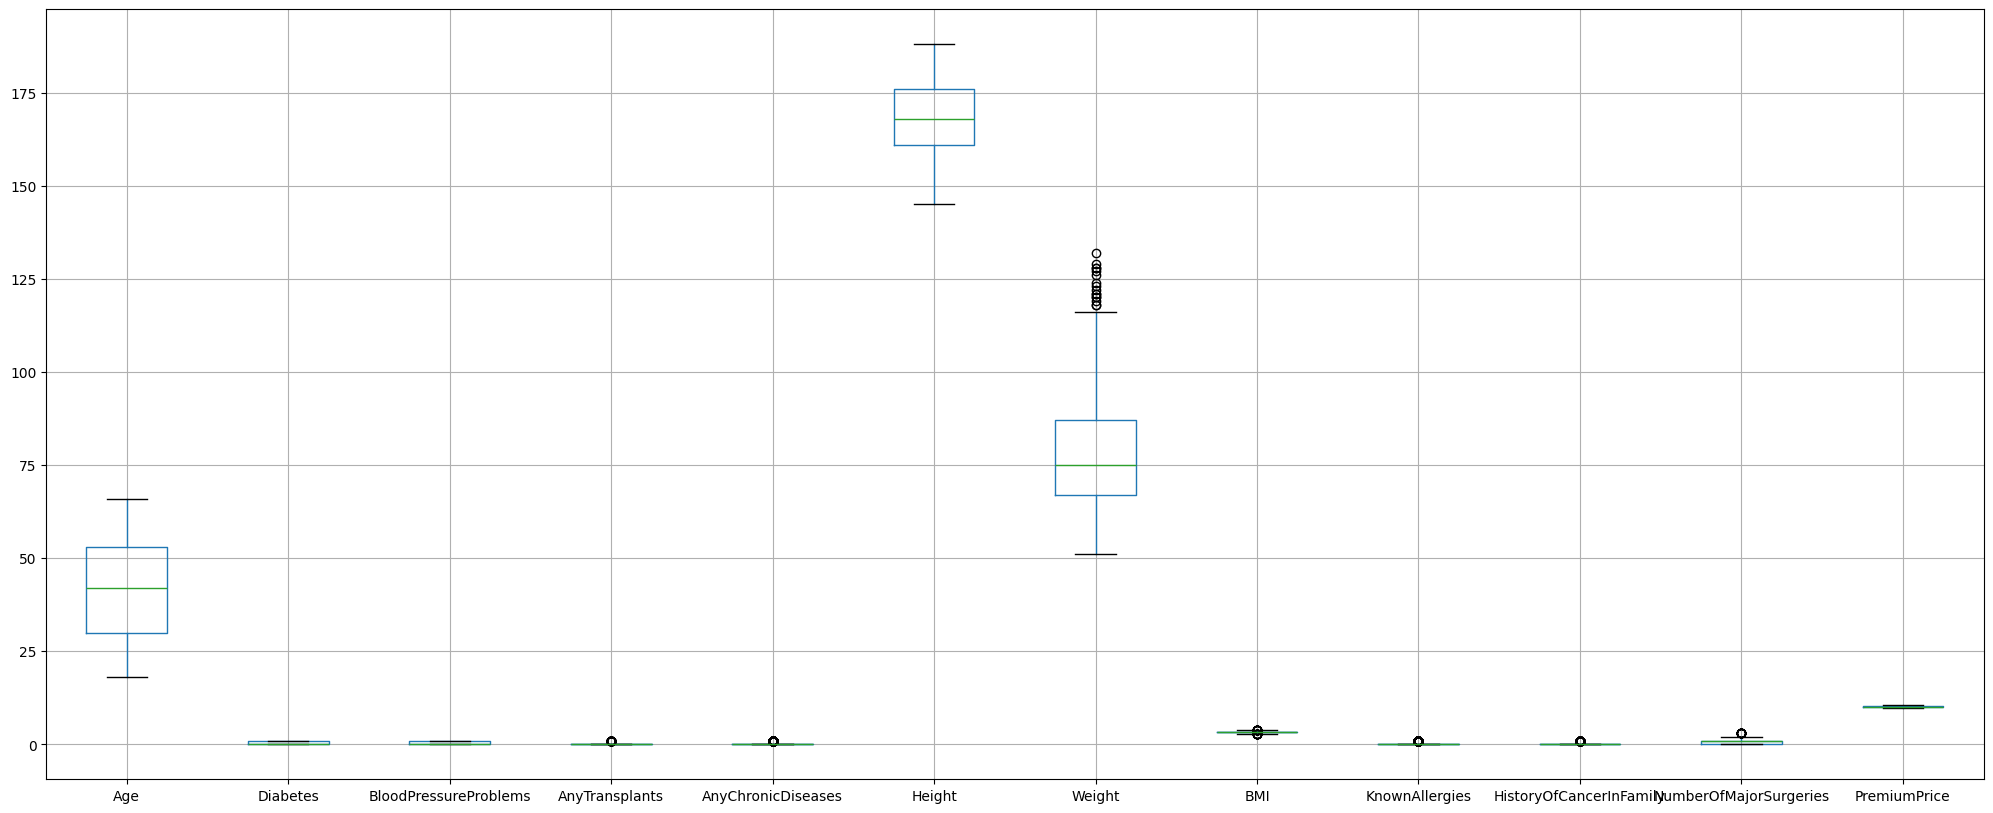

In [90]:
plt.figure(figsize=(25,10))
df.boxplot()
plt.show()

In [91]:
for col in df.columns:
    print(F"{col} :{df[col].unique()}")

Age :[45 60 36 52 38 30 33 23 48 66 24 46 18 42 57 21 49 20 35 53 31 22 26 28
 64 50 44 58 43 25 54 63 61 41 55 19 40 32 27 34 59 29 47 39 37 51 56 62
 65]
Diabetes :[0 1]
BloodPressureProblems :[0 1]
AnyTransplants :[0 1]
AnyChronicDiseases :[0 1]
Height :[155 180 158 183 166 160 150 181 169 182 175 186 178 184 149 154 156 163
 151 172 162 153 168 152 161 157 147 173 179 165 174 185 177 164 148 170
 187 167 159 188 171 176 146 145]
Weight :[ 57  73  59  93  88  69  54  79  74  67  97  76  68  82  61  81  92  83
  58  96  91  85  55  78  56  77  63  75  72  70  80  60  53  94  84  87
  64  95  66  62  86  90  65 116 118 110 121  98 104  89  71 106  99 119
 107 129 109 100 127 132 120 128 114 123 111 103 126 102 105 124 122  52
  51 101]
BMI :[3.16674007 3.31247493 3.3239563  3.46354601 3.2939833  3.17805383
 3.18262669 3.25462899 3.33505758 3.18469837 2.96372548 2.88981605
 3.35515344 3.51986891 3.27940632 3.40717945 3.54327548 3.22167191
 3.63468723 3.20761263 3.29953373 3.75044481 2.

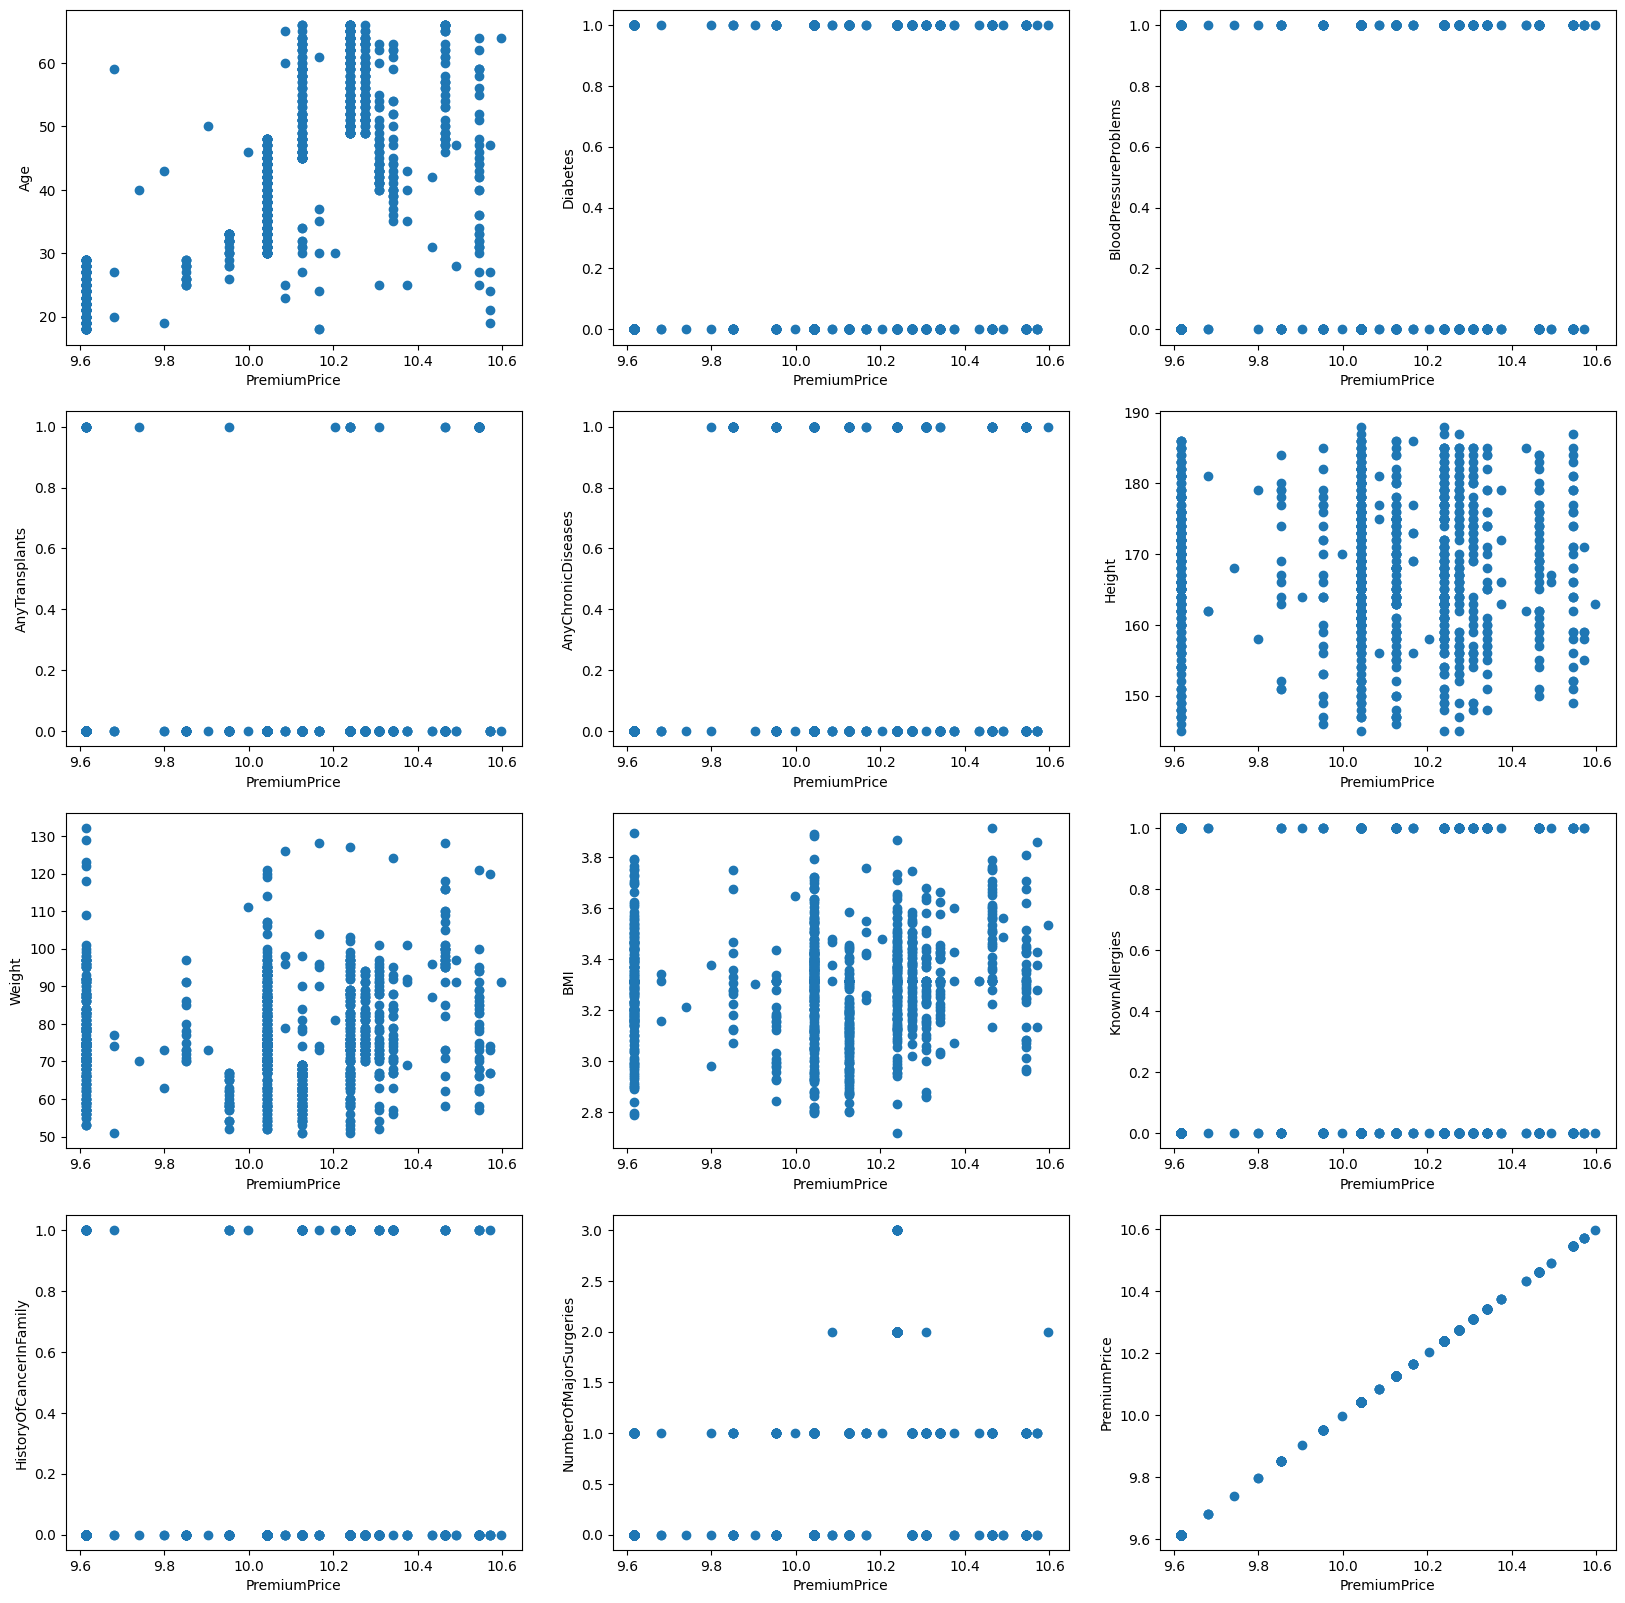

In [92]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(df.columns):
    plt.subplot(4, 3, i + 1)
    plt.scatter(df["PremiumPrice"], df[col])
    plt.xlabel('PremiumPrice')
    plt.ylabel(col)

plt.show()

In [93]:
scaler = StandardScaler()

X = scaler.fit_transform(X)
y = scaler.fit_transform(np.array(y).reshape(-1,1))

print(X)

[[ 0.23319694 -0.85075039 -0.93897784 ... -0.52335629 -0.35977593
  -0.89118667]
 [ 1.30798124  1.1754329  -0.93897784 ... -0.52335629 -0.35977593
  -0.89118667]
 [-0.41167363  1.1754329   1.06498786 ... -0.52335629 -0.35977593
   0.44423895]
 ...
 [ 1.02137209 -0.85075039  1.06498786 ... -0.52335629 -0.35977593
   0.44423895]
 [ 0.37650152  1.1754329   1.06498786 ...  1.9107442  -0.35977593
   0.44423895]
 [-1.48645793 -0.85075039 -0.93897784 ...  1.9107442  -0.35977593
   0.44423895]]


In [94]:
def compute_errors(model, X, y, kf):
    mse_list = []
    mae_list = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse_list.append(mean_squared_error(y_test, y_pred))
        mae_list.append(mean_absolute_error(y_test, y_pred))
    return np.mean(mse_list), np.mean(mae_list)

In [95]:
warnings.filterwarnings('ignore')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)
y = y.reshape(-1,1)

model = {"LinearRegression":LinearRegression(), "SVR":SVR(), "RandomForestRegressor":RandomForestRegressor()}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name,model in model.items():
    print(name)

    #cross-validation
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores = cross_val_score(model, X, y, cv=kf, scoring='r2')
    print("Cross-validated R² scores:", scores)
    print("Mean R² score:", scores.mean())
    print("R²-score without cross-validation: ",metrics.r2_score(y_test,y_pred))

    mse, mae = compute_errors(model, X_train, y_train, kf)
    print("K-fold MSE:", mse)
    print("K-fold MAE:", mae)
    print()

LinearRegression
Cross-validated R² scores: [0.71328938 0.62683628 0.58634529 0.44711405 0.70288397]
Mean R² score: 0.6152937929032042
R²-score without cross-validation:  0.7132893847687654
K-fold MSE: 0.3847270304033855
K-fold MAE: 0.44065449054204453

SVR
Cross-validated R² scores: [0.72565704 0.63144123 0.64058562 0.423596   0.71752542]
Mean R² score: 0.6277610622250898
R²-score without cross-validation:  0.725657039043575
K-fold MSE: 0.37464757901819756
K-fold MAE: 0.40008158539138244

RandomForestRegressor
Cross-validated R² scores: [0.89844026 0.76408707 0.70127513 0.70002936 0.84450987]
Mean R² score: 0.7816683366511185
R²-score without cross-validation:  0.8948197661397993
K-fold MSE: 0.2624608734498869
K-fold MAE: 0.21340980816496216

